In [1]:
# Importy

import pandas as pd
import seaborn as sns
import os
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('25__iris.csv', sep=",")


# Analiza danych dotycząca irysów

![irsy](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*VucNhXeY_YFMwHOZ)

# <font color='cyan'>Ogólne zapoznanie się z danymi</font>

## O Danych

Zbiór danych zawiera informacje o trzech gatunkach irysów: Iris setosa, Iris versicolor, i Iris virginica.

Dane obejmują pomiary czterech cech: długość i szerokość działki kielicha oraz długość i szerokość płatka.

Każdy wiersz w zbiorze danych reprezentuje pojedynczy kwiat, a wartości pomiarów są podane w centymetrach.

Zbiór składa się z 150 próbek, po 50 dla każdego gatunku, i jest szeroko stosowany jako podstawowy zbiór danych do
testowania algorytmów klasyfikacji oraz w nauce o danych i uczeniu maszynowym.

Kolumny:
* **długość kielicha (sepal length)** - Długość kielicha w cm
* **szerokość kielicha (sepal width)** - Szerokość kielicha w cm
* **długość płatka (petal length)** - Długość płatka w cm
* **szerokość płatka (petal width)** - Szerokość płatka w cm
* **klasa (class)** - Klasa irysa (setosa, versicolor, virginica)

In [4]:
# Pobieranie 10 losowych rekordów
df.sample(10, random_state=42)

długość kielicha (sepal length)  szerokość kielicha (sepal width)  \
73                               6.1                               2.8   
18                               5.7                               3.8   
118                              7.7                               2.6   
78                               6.0                               2.9   
76                               6.8                               2.8   
31                               5.4                               3.4   
64                               5.6                               2.9   
141                              6.9                               3.1   
68                               6.2                               2.2   
82                               5.8                               2.7   

     długość płatka (petal length)  szerokość płatka (petal width)  \
73                             4.7                             1.2   
18                             1.7                             0.3   
118                            6.9                             2.3   
78                             4.5                             1.5   
76                             4.8                             1.4   
31                             1.5                             0.4   
64                             3.6                             1.3   
141                            5.1                             2.3   
68                             4.5                             1.5   
82                             3.9                             1.2   

       klasa (class)  
73   Iris-versicolor  
18       Iris-setosa  
118   Iris-virginica  
78   Iris-versicolor  
76   Iris-versicolor  
31       Iris-setosa  
64   Iris-versicolor  
141   Iris-virginica  
68   Iris-versicolor  
82   Iris-versicolor

## Poszukiwanie wartości brakujących

In [6]:
info_df = pd.DataFrame({
    "Column": df.columns,
    "Wartości brakujące": [df[col].isnull().sum() for col in df.columns],
    
})
info_df

Column  Wartości brakujące
0   długość kielicha (sepal length)                   0
1  szerokość kielicha (sepal width)                   0
2     długość płatka (petal length)                   0
3    szerokość płatka (petal width)                   0
4                     klasa (class)                   0

 Już na tym etapie możemy wykluczyć braki w danych co jest dobrą informacją bo to oznacza, że dane są kopletne i prawdopodobnie
 zostały zebrane w rzetelny sposób.

## Rozkład danych z podziałem na gatunki

In [22]:
# Policzenie wartości w kolumnie i przekształcenie w DataFrame
value_counts_df = df['klasa (class)'].value_counts().reset_index()

# Wyświetlenie wyników
value_counts_df

klasa (class)  count
0      Iris-setosa     50
1  Iris-versicolor     50
2   Iris-virginica     50

Na każdą klase przypada taka sama liczba rekordów. Dane wyglądają na bardzo kompletne i dobrze zebrane.

## Poszukiwanie wartości unikatowych

In [40]:
unique_df = df.nunique().reset_index()
unique_df

index   0
0   długość kielicha (sepal length)  35
1  szerokość kielicha (sepal width)  23
2     długość płatka (petal length)  43
3    szerokość płatka (petal width)  22
4                     klasa (class)   3

Jak można zauważyć, występuje tu całkiem spora różnorodność.

## Sprawdzenie czy występują duplikaty

In [15]:
df[df.duplicated()]

długość kielicha (sepal length)  szerokość kielicha (sepal width)  \
34                               4.9                               3.1   
37                               4.9                               3.1   
142                              5.8                               2.7   

     długość płatka (petal length)  szerokość płatka (petal width)  \
34                             1.5                             0.1   
37                             1.5                             0.1   
142                            5.1                             1.9   

      klasa (class)  
34      Iris-setosa  
37      Iris-setosa  
142  Iris-virginica

Jak widać nawet przy takich danych, które można by było uznać za unikatowe i raczej niepowtarzalne, wystąpiły duplikaty.

## Podsumowanie kolumn numerycznych

In [29]:
# Podsumowanie kolumn numerycznych oraz zaokrąglanie
df.describe().round(2)
            

długość kielicha (sepal length)  szerokość kielicha (sepal width)  \
count                           150.00                            150.00   
mean                              5.84                              3.05   
std                               0.83                              0.43   
min                               4.30                              2.00   
25%                               5.10                              2.80   
50%                               5.80                              3.00   
75%                               6.40                              3.30   
max                               7.90                              4.40   

       długość płatka (petal length)  szerokość płatka (petal width)  
count                         150.00                          150.00  
mean                            3.76                            1.20  
std                             1.76                            0.76  
min                             1.00                            0.10  
25%                             1.60                            0.30  
50%                             4.35                            1.30  
75%                             5.10                            1.80  
max                             6.90                            2.50

## Podsumowanie

- Znaczna większość to kolumny numeryczne (4/5),
- Dane nie mają żadnych braków,
- Pojawiły się duplikaty nawet w tak małym zbiorze danych,
- Dane składają się z 150 rekordów po 50 na każdy gatunek irysa,
- Można zauważyć dużą różnice między wartościami największymi i najmniejszymi.

Hipoteza: czy jeden z podanych gatunków nie jest znacznie większy od pozostałych?

# <font color='green'>Analiza pojedyńczych zmiennych</font>

In [5]:
# Grupowanie według gatunków 

pd.set_option('max_colwidth', None)
grouped = df.groupby('klasa (class)', as_index=False)

stats = grouped.agg(['mean', 'std', 'min', 'max']).round(2)
stats

długość kielicha (sepal length)                  \
                                           mean   std  min  max   
klasa (class)                                                     
Iris-setosa                                5.01  0.35  4.3  5.8   
Iris-versicolor                            5.94  0.52  4.9  7.0   
Iris-virginica                             6.59  0.64  4.9  7.9   

                szerokość kielicha (sepal width)                  \
                                            mean   std  min  max   
klasa (class)                                                      
Iris-setosa                                 3.42  0.38  2.3  4.4   
Iris-versicolor                             2.77  0.31  2.0  3.4   
Iris-virginica                              2.97  0.32  2.2  3.8   

                długość płatka (petal length)                  \
                                         mean   std  min  max   
klasa (class)                                                   
Iris-setosa                              1.46  0.17  1.0  1.9   
Iris-versicolor                          4.26  0.47  3.0  5.1   
Iris-virginica                           5.55  0.55  4.5  6.9   

                szerokość płatka (petal width)                  
                                          mean   std  min  max  
klasa (class)                                                   
Iris-setosa                               0.24  0.11  0.1  0.6  
Iris-versicolor                           1.33  0.20  1.0  1.8  
Iris-virginica                            2.03  0.27  1.4  2.5

Tutaj potwierdza się hipoteza jeden z gatunków jest znacznie większy od pozostałych i jest to Iris-virginica.

## Rozkład cech

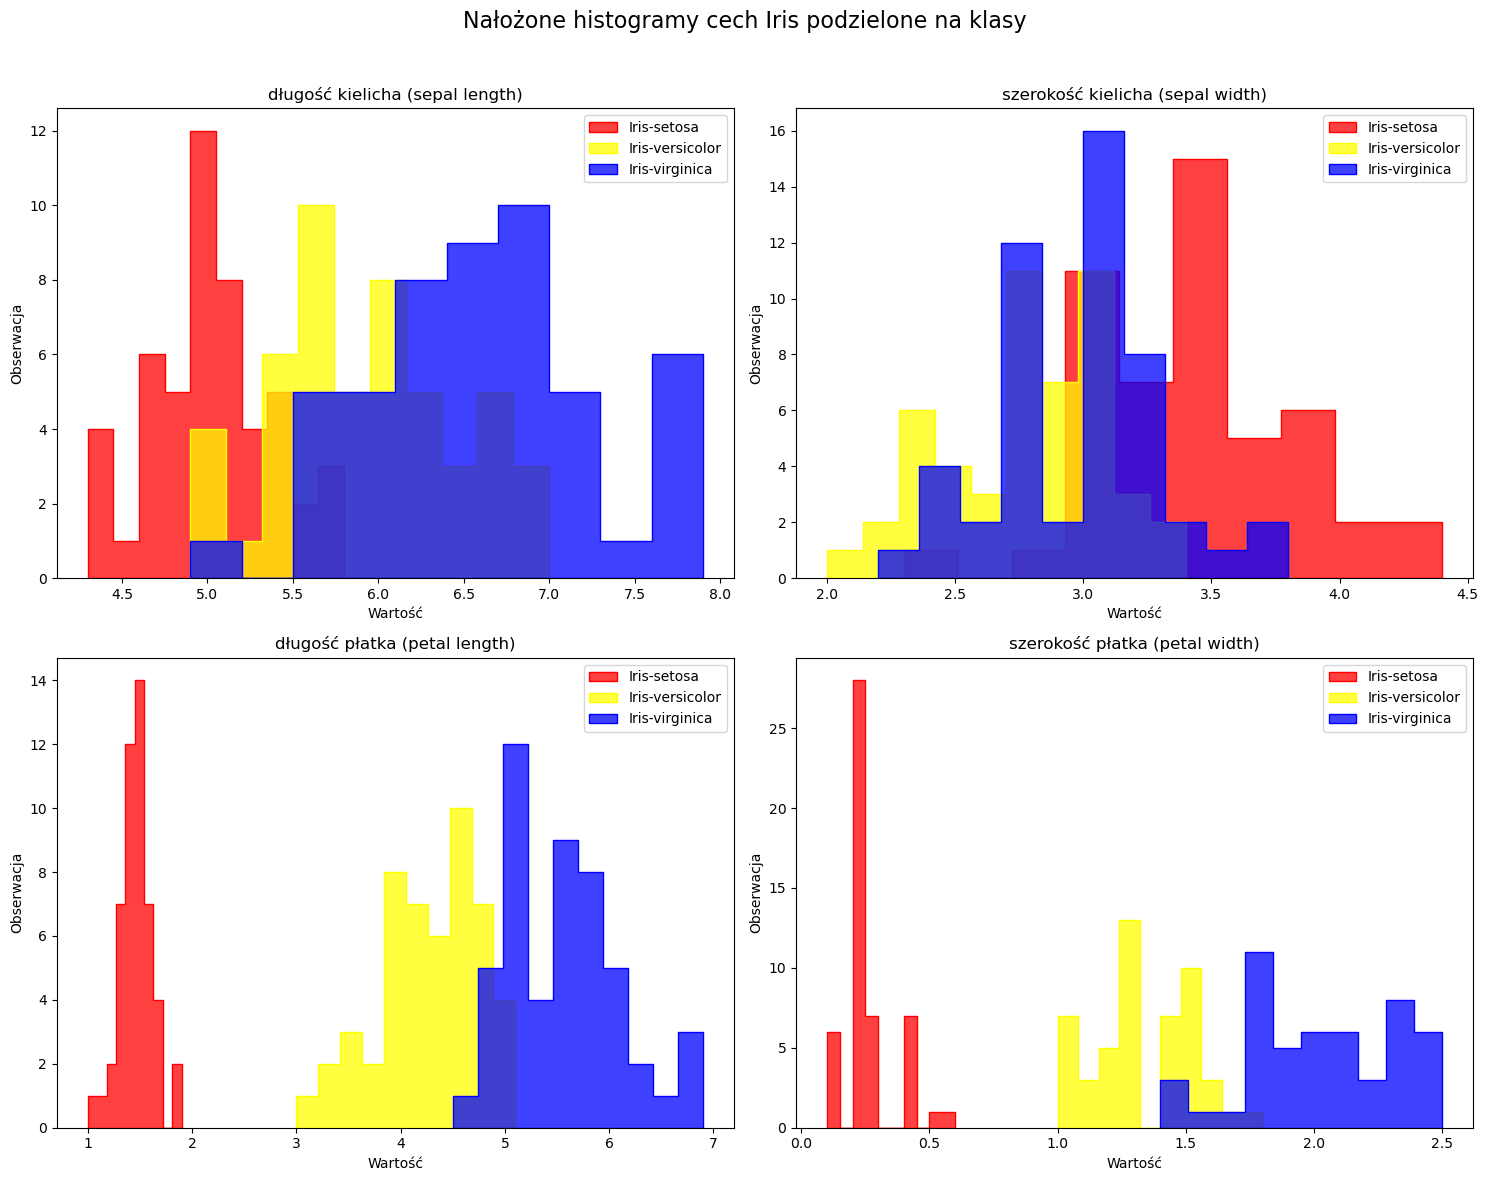

In [6]:
# Określanie wykresów dla nałożonych na siebie histogramów
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Nałożone histogramy cech Iris podzielone na klasy', fontsize=16)

# Tworzenie listy kolumn numerycznych
numeric_columns = [
    'długość kielicha (sepal length)',
    'szerokość kielicha (sepal width)',
    'długość płatka (petal length)',
    'szerokość płatka (petal width)'
]

# Lista unikatowych klas
classes = df['klasa (class)'].unique()
colors = ['red', 'yellow', 'blue']

# Rysowanie histogramów 
for ax, col in zip(axs.flat, numeric_columns):
    for class_name, color in zip(classes, colors):
        sns.histplot(df[df['klasa (class)'] == class_name][col], kde=False, bins=10, ax=ax, label=class_name, color=color, element='step', stat='count', common_norm=False)
    ax.set_title(col)
    ax.set_xlabel('Wartość')
    ax.set_ylabel('Obserwacja')
    ax.legend()

# Dostosowywanie 
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('Nałożone histogramy cech Iris podzielone na klasy', dpi=300)
plt.show()

# Podsumowanie

- Histrogramy pokazują, że te gatunki znacznie różnia się jeśli chodzi szerokość i długość płatka, po czym można je rozpoznać gołym okiem,
- Największym gatunkiem zdecydowanie jest iris-virginica, jest to zdecydowanie najdłuższy gatunek ze wszystkich zarówno jeśli mówimy o kielichu jak i samych płatkach,
- Najmniejszym jest iris-setosa co idealnie obrazują wykresy nr. 3 oraz 4, chociaż ma szerokki kielich. Główne cechy to szeroki, ale krótki kielich oraz małe cienkie płatki,
- Iris-versicolor jest czymś pomiędzy dwoma powyżej, ale ma znacznie dłuższe i szersze płatki od iris-setosa.

# <font color='red'>Analiza relacji między zmiennymi</font>

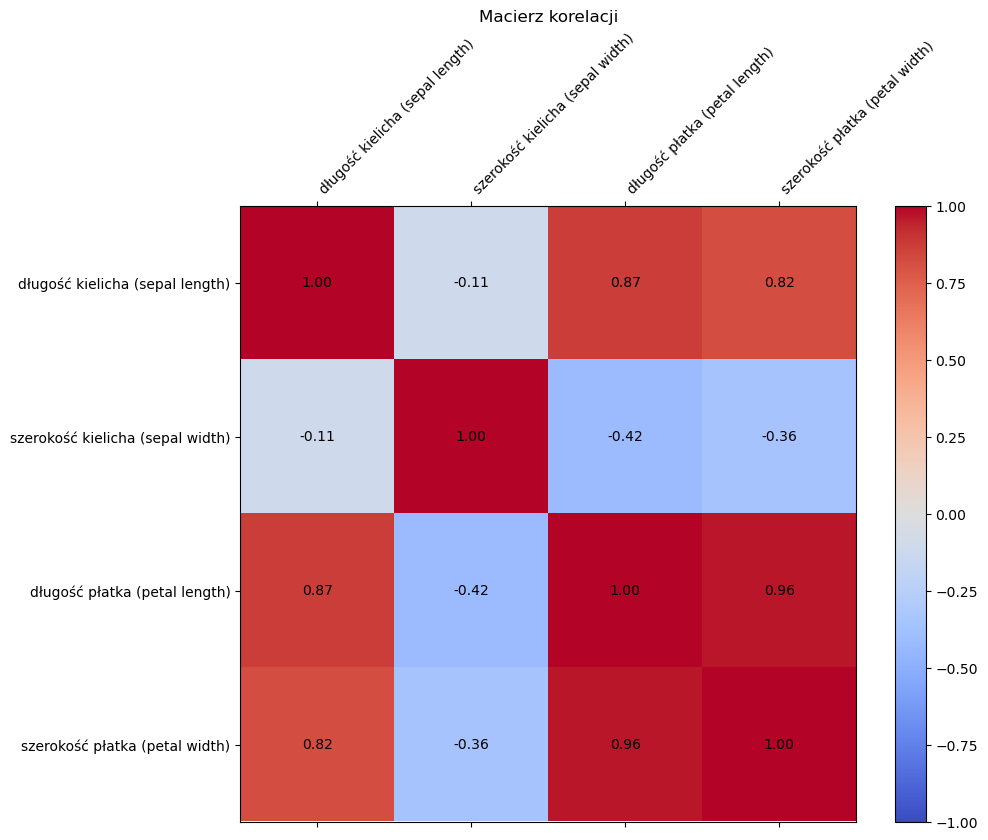

In [10]:
# Macierz korelacji

# Obliczanie korelacji dla kolumn numerycznych
corr_matrix = df.iloc[:, :-1].corr()

# Tworzenie macierzy korelacji z wartościami
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Dodawanie paska kolorów
fig.colorbar(cax)

# Ustawienie etykiet
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='left')
ax.set_yticklabels(corr_matrix.columns)

# Dodawanie wartości korelacji
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.title('Macierz korelacji')
plt.show()

##  Podsumowanie macierza:
- Długość oraz szerokość płatka mają bardzo wysoki poziom korelacji co za tym idzie dłuższe płatki są również szersze,
- Co do długości kielicha im dłuższy kielich tym szerszy oraz dłuższy płatek,
- Nie ma żadnej zależności między szerokością a długością kielicha,
- Jest bardzo mała odwrócona korelacja między szerokością kielicha a długością płatka co oznacza, że kwiaty z szerszym kielichem mogą mieć krótsze płatki,
- Między szerokością kielicha a szerokością płatka nie ma żadnej korelacji

## Ogólny rozdkład zmiennych mniędzy gatunkami

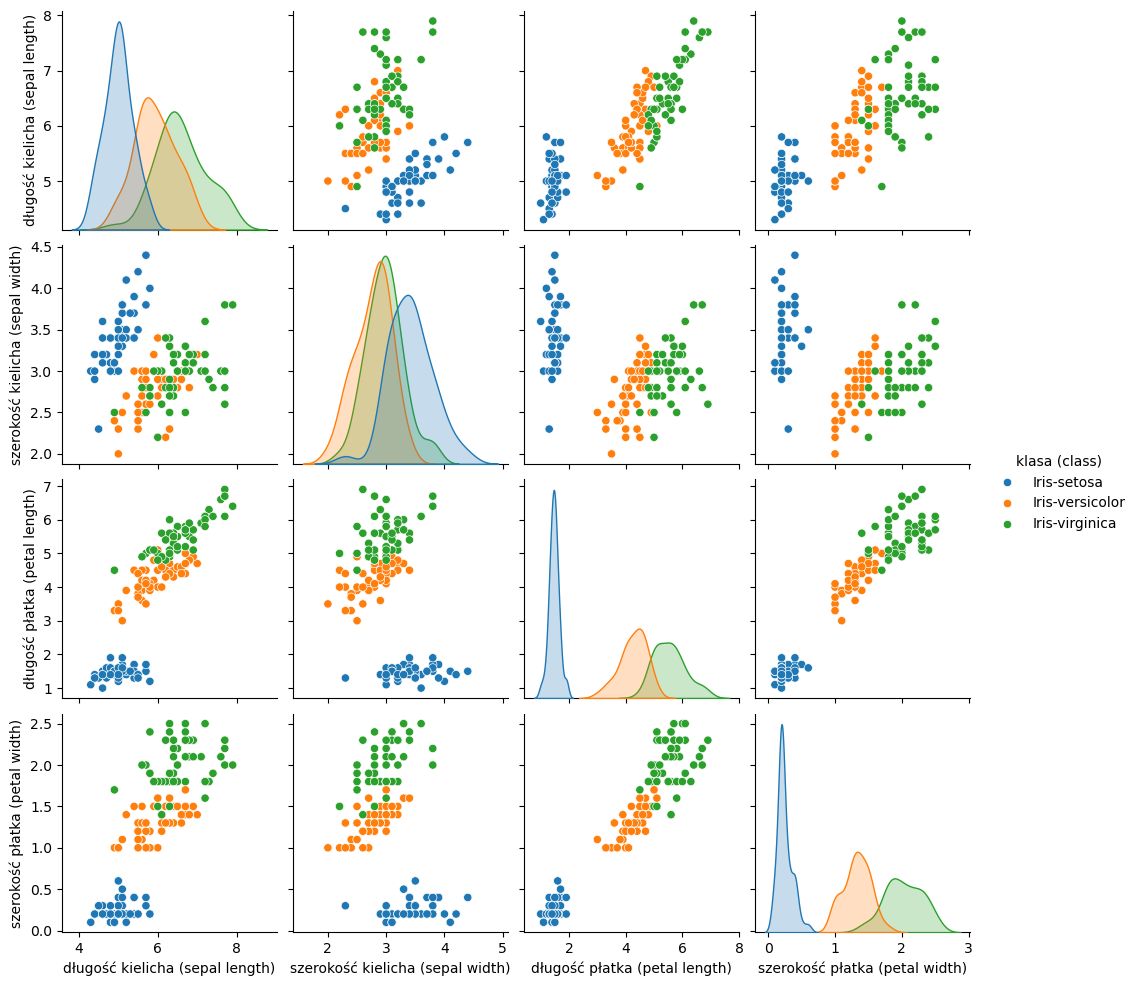

In [15]:
# Określanie par 
pairplot = sns.pairplot(df, hue="klasa (class)")

# Zapisywanie jako PNG
pairplot.savefig("scatterplot_pairs.png")

# Deklarowanie rezultatu
result = { "type": "plot", "value": "scatterplot_pairs.png" }

# Podsumowanie scatter plotów:
- Iris-setosa jest zdecydowanie najbardziej odseparowana od pozostałych gatunków
- Iris-virginica oraz iris-versicolor dość często nakładają się na siebie co idze w parze z tym, że moża dopatrzyć się między nimi podobieństwa, choć dalej można jest rozróżnić po płatkach.

# <font color='magenta'>Poszukiwanie wartości odstających</font>

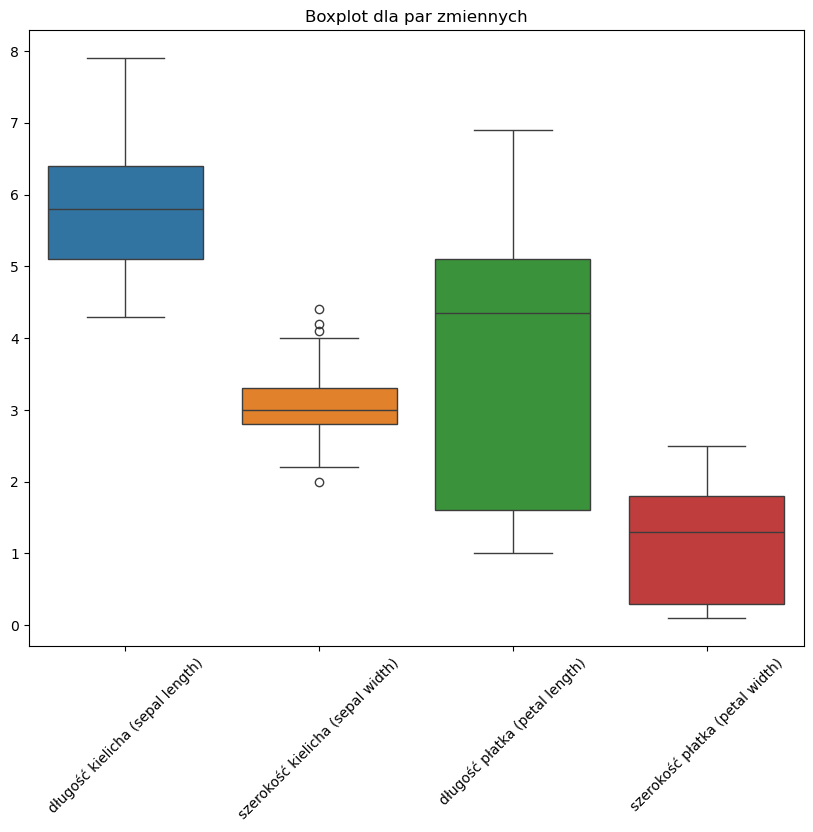

In [16]:
data = {
    "długość_kielicha (sepal length)": [7.3, 5.5, 5.6],
    "szerokość kielicha (sepal width)": [2.4, 4.0, 4.4],
    "długość płatka (petal length)": [5.4, 5.6, 3.5],
    "szerokość płatka (petal width)": [2.1, 0.3, 2.0],
    "klasa (class)": ["Iris-setosa", "Iris-virginica", "Iris-versicolor"]
}

dfs = [pd.DataFrame(data)]

# Tworzenie boxplotów dla par zmiennych
plt.figure(figsize=(10, 8))
sns.boxplot(data=df.drop(columns=["klasa (class)"]))
plt.xticks(rotation=45)
plt.title("Boxplot dla par zmiennych")

# Zapisywanie jako PNG
plot_filename = "boxplot_pairs.png"
plt.savefig(plot_filename)

# Deklarowanie rezultatu
result = { "type": "plot", "value": plot_filename }

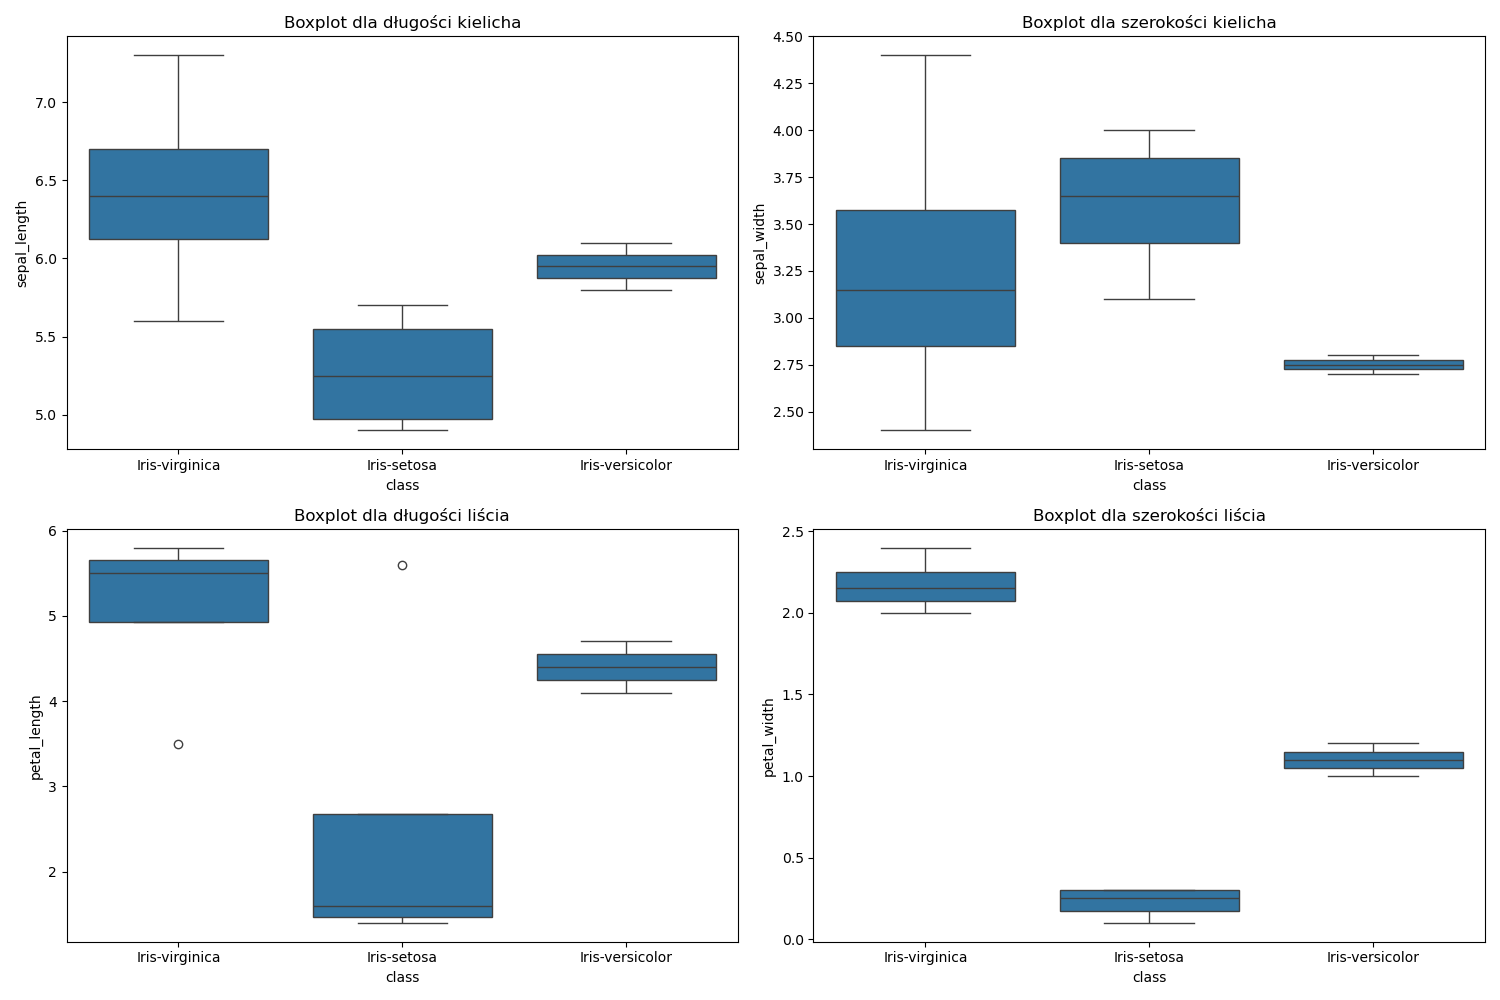

In [28]:
from IPython.display import Image
Image("boxplot_pairs.png")

# Podsumowanie:
- Wartości odstające są znikome,
- Największą wartość odstającą ma *iris-setosa* jeśli chodzi o długość liścia jest to bardzo odstająca wartość, liść ten jest ogromny w porównaniu do średniej
- Drugą największą wartością odstającą (i ostatnią) ale w drugim kierunku ma *iris-virginica*, długość liścia jest o wiele wiele za krótka. 

# <font color='orange'>Ostateczne podsumowanie</font>

1. Dane są kompletne
2. Między wartościami min/max występują duże różnice
3. Gatunki te znacznie różnia się jeśli chodzi szerokość i długość płatka, po czym można je rozpoznać gołym okiem
4. Największym gatunkiem jest **iris-virginica** a najmniejszym **iris-setosa** jeśli chodzi o długość kielicha i płatków
5. **iris-setosa** ma zdecydowanie najszerszy kielich oraz największą wartość odstającą
6. Występują silne korelacje między długością a szerokością płatków, im dłuższy płatek tym szerszy
7. Co do długości kielicha im dłuższy kielich tym szerszy oraz dłuższy płatek
8. Między długością a szerokością kielichów
9. **Iris-setosa** różni się najbardziej wyglądem od pozostałych
10. Długość płatka i szerokość kielicha wykazują lekko odwróconą korelacje, co **może** oznaczać, że mi szerszy kielich tym krótszy płatek

## Dziękuję za uwagę!
Kacper Szaruga